<a href="https://colab.research.google.com/github/sogamradhika-bit/BML.Exp1/blob/main/BMLCA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded bank-full.csv from UCI.

Dataset shape: (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45

/tmp/ipython-input-560290139.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


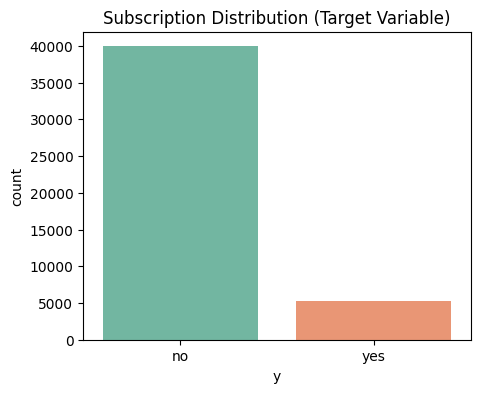

<Figure size 640x480 with 0 Axes>

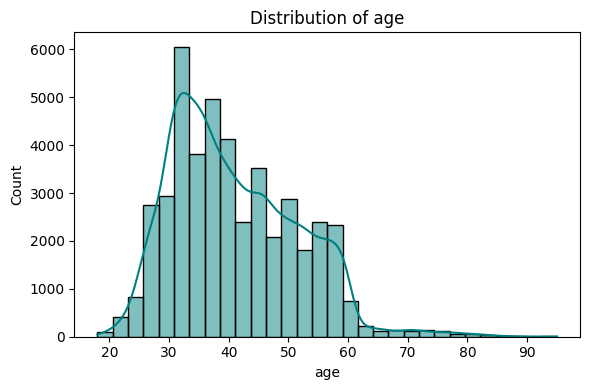

<Figure size 640x480 with 0 Axes>

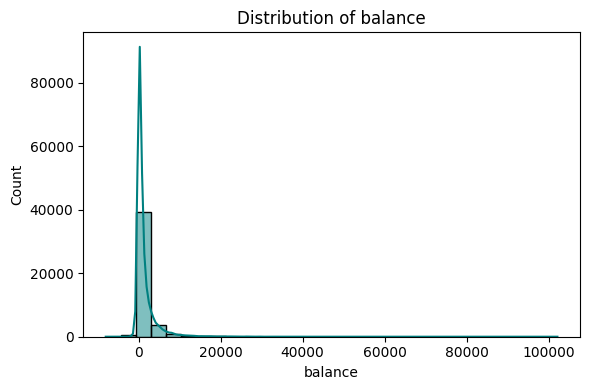

<Figure size 640x480 with 0 Axes>

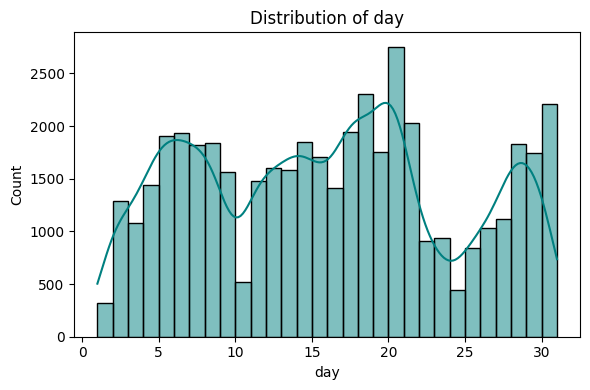

<Figure size 640x480 with 0 Axes>

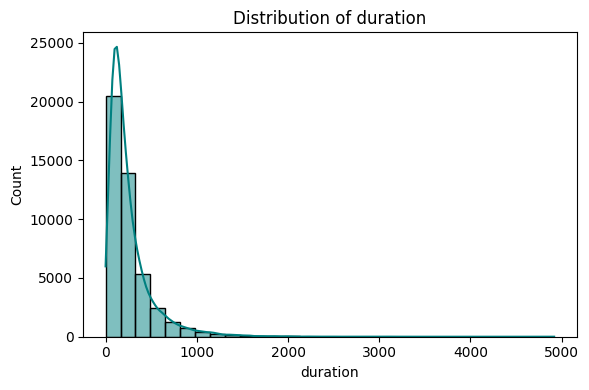

<Figure size 640x480 with 0 Axes>

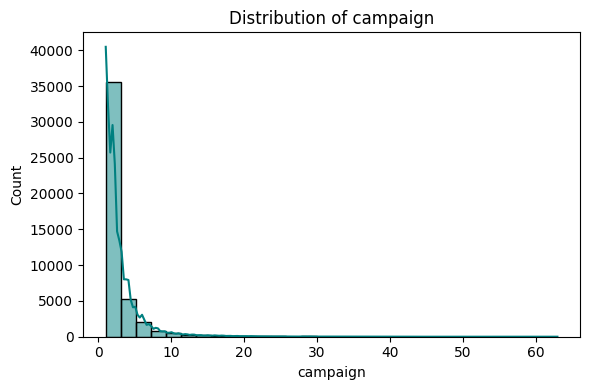

<Figure size 640x480 with 0 Axes>

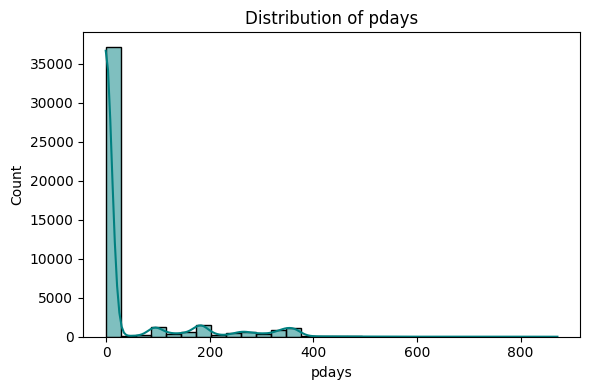

<Figure size 640x480 with 0 Axes>

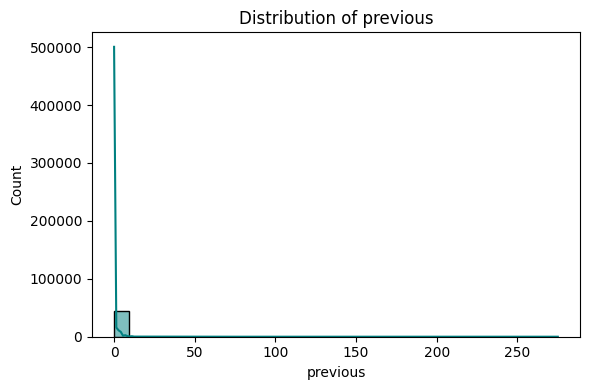

<Figure size 640x480 with 0 Axes>

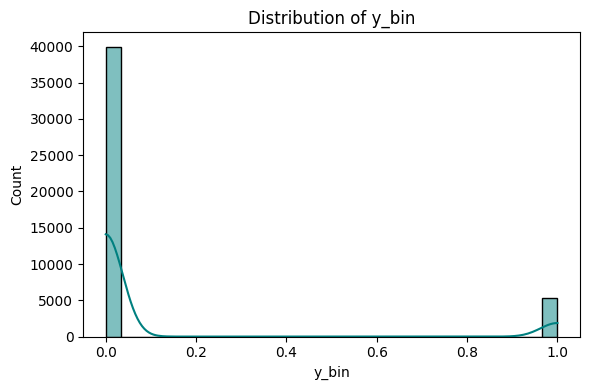

/tmp/ipython-input-560290139.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='duration', data=df, palette='muted')


<Figure size 640x480 with 0 Axes>

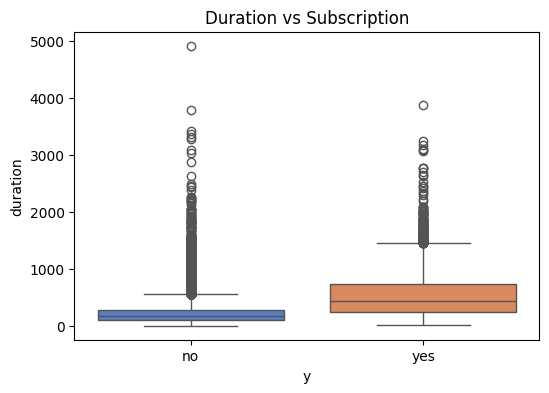

<Figure size 640x480 with 0 Axes>

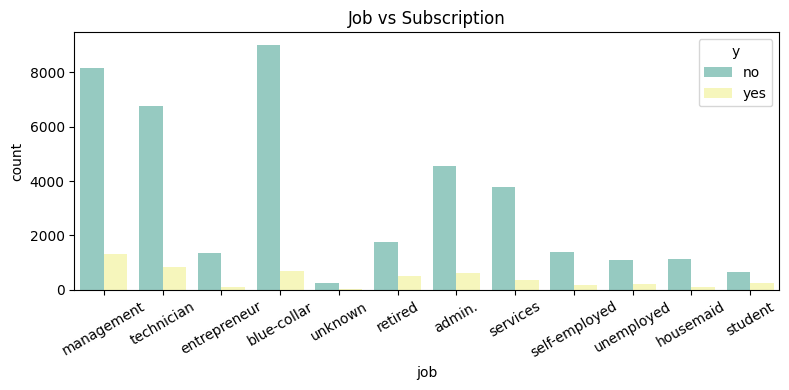

<Figure size 640x480 with 0 Axes>

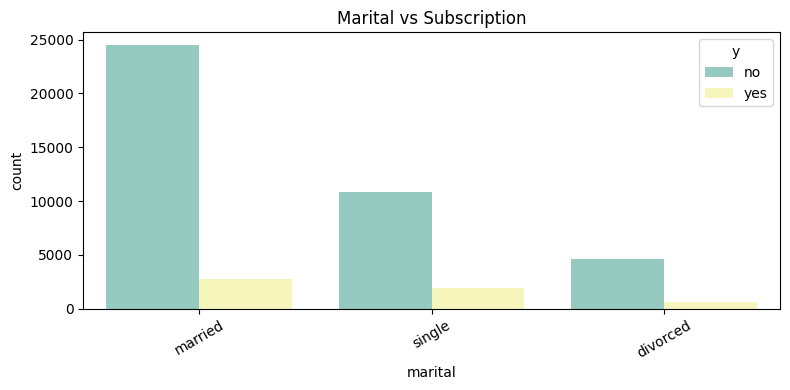

<Figure size 640x480 with 0 Axes>

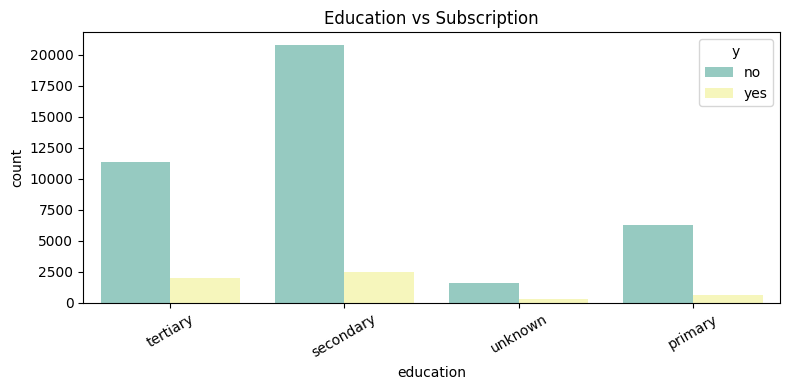

<Figure size 640x480 with 0 Axes>

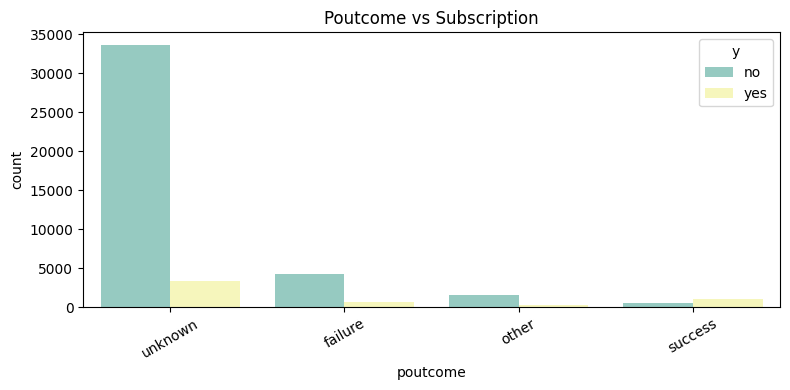

<Figure size 640x480 with 0 Axes>

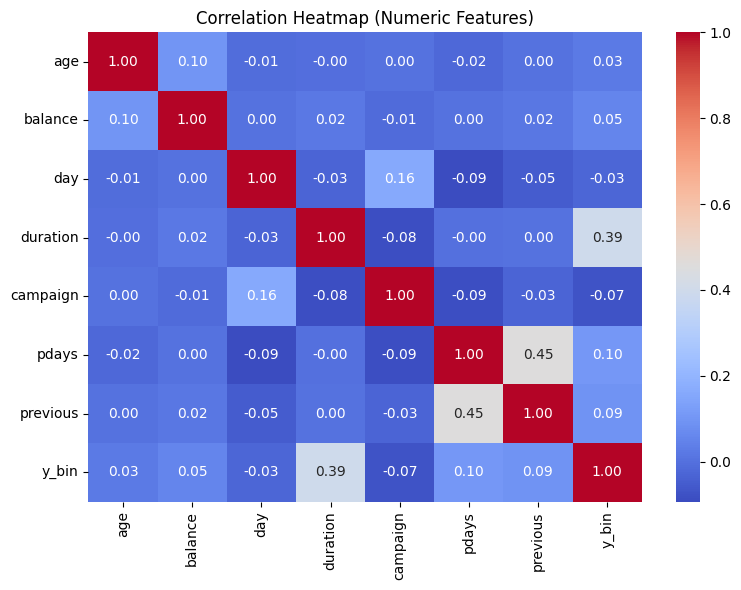

<Figure size 640x480 with 0 Axes>

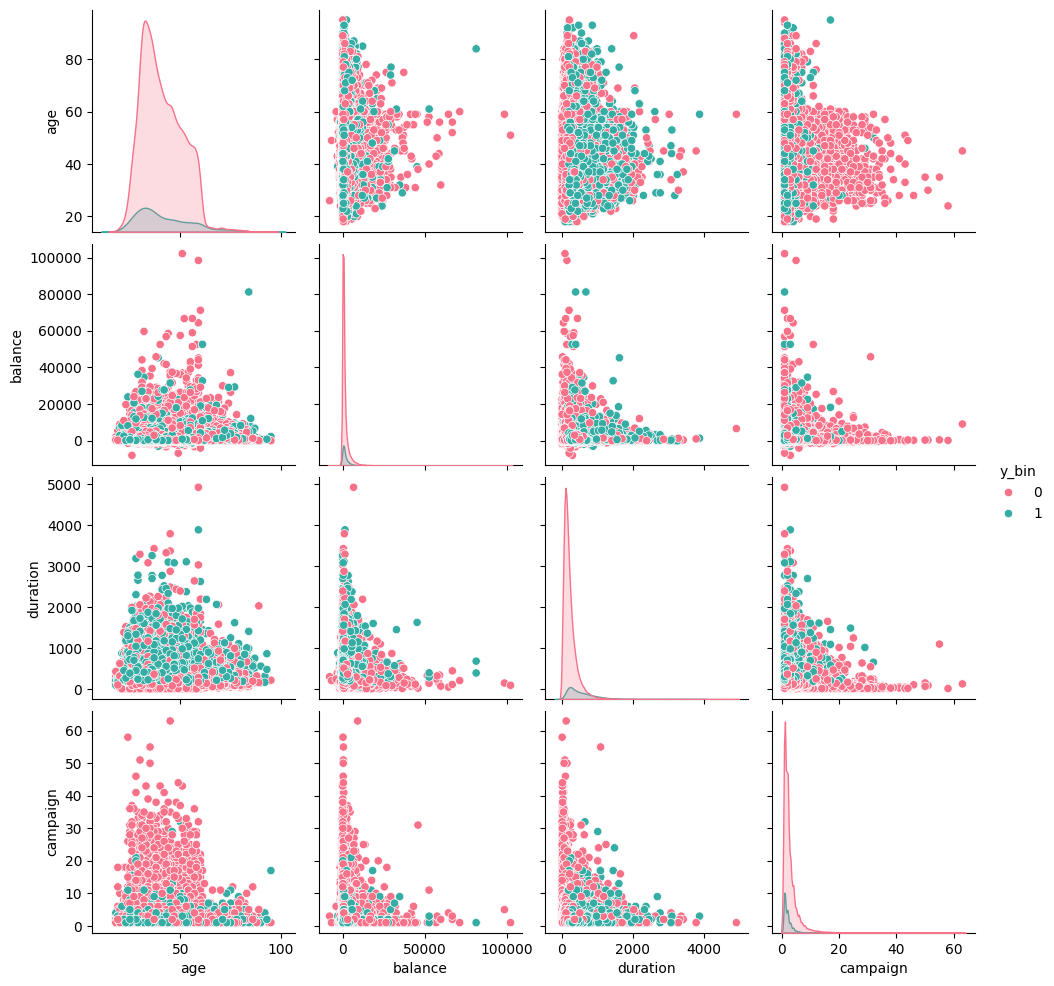

Chosen feature for manual emphasis: poutcome
y            no   yes
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33573  3386


<Figure size 640x480 with 0 Axes>

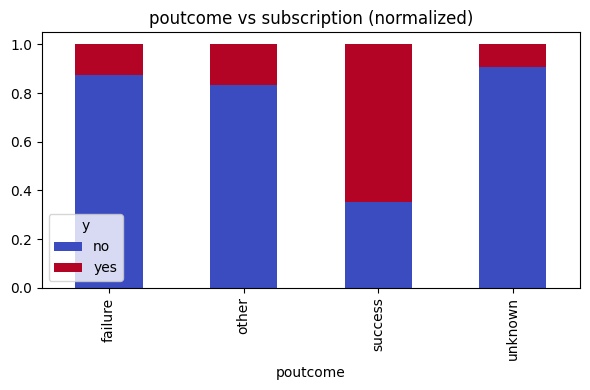


LogisticRegression Results:
Acc=0.901, Prec=0.644, Rec=0.348, F1=0.452, ROC=0.906


<Figure size 640x480 with 0 Axes>

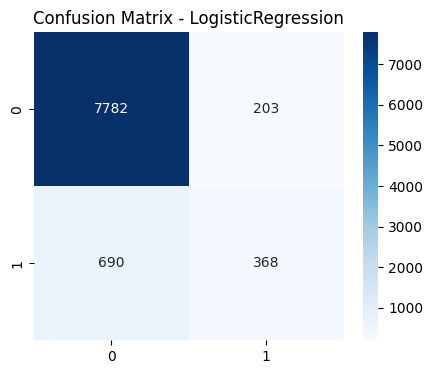


RandomForest Results:
Acc=0.907, Prec=0.670, Rec=0.410, F1=0.509, ROC=0.929


<Figure size 640x480 with 0 Axes>

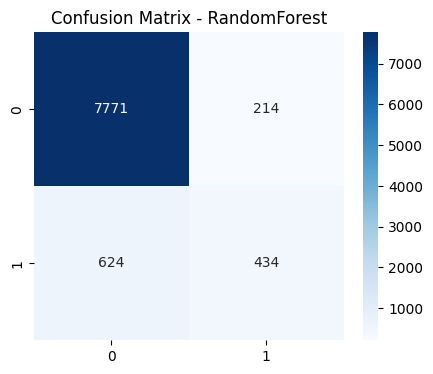

/tmp/ipython-input-560290139.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=imp, palette='viridis')


<Figure size 640x480 with 0 Axes>

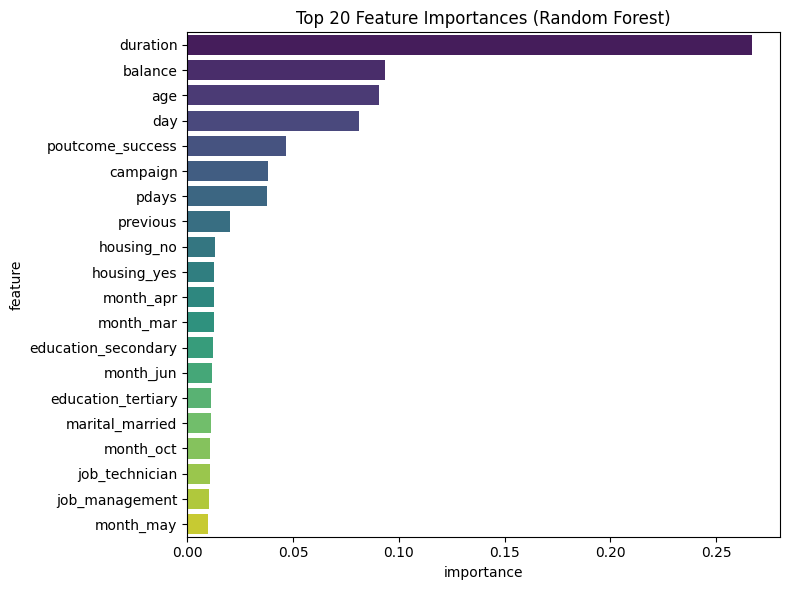


=== Summary ===
Feature highlighted: poutcome
All EDA graphs saved and shown from: outputs/
Prepared by: Radhika Sogam | PRN: 1032231203
End of script.


<Figure size 640x480 with 0 Axes>

In [5]:


import os
from pathlib import Path
import zipfile
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib

USER_NAME = "Radhika Sogam"
PRN = "1032231203"
OUTDIR = Path("outputs")
OUTDIR.mkdir(exist_ok=True)

# === Load Data ===
ZIP_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
CSV_NAME = "bank-full.csv"

import requests
resp = requests.get(ZIP_URL, timeout=15)
z = zipfile.ZipFile(io.BytesIO(resp.content))
with z.open(CSV_NAME) as f:
    df = pd.read_csv(f, sep=';')
print(f"Loaded {CSV_NAME} from UCI.")

# === Basic Info ===
print("\nDataset shape:", df.shape)
print(df.head())
print(df.info())

df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})

# === EDA PLOTS ===
print("\nPerforming EDA (showing and saving plots)...")

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Subscription Distribution (Target Variable)')
plt.show()
plt.savefig(OUTDIR / 'eda_target_distribution.png')

# Numeric distributions
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    plt.savefig(OUTDIR / f'eda_distribution_{col}.png')

# Boxplot duration vs y
plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='duration', data=df, palette='muted')
plt.title('Duration vs Subscription')
plt.show()
plt.savefig(OUTDIR / 'eda_duration_vs_y.png')

# Categorical feature distributions
important_cats = ['job', 'marital', 'education', 'poutcome']
for col in important_cats:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, hue='y', palette='Set3')
    plt.title(f'{col.title()} vs Subscription')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    plt.savefig(OUTDIR / f'eda_{col}_vs_y.png')

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()
plt.savefig(OUTDIR / 'eda_correlation_heatmap.png')

# Pairplot subset
subset_cols = ['age', 'balance', 'duration', 'campaign', 'y_bin']
sns.pairplot(df[subset_cols], hue='y_bin', palette='husl')
plt.show()
plt.savefig(OUTDIR / 'eda_pairplot_subset.png')

# === Manual Feature Selection ===
chosen_feature = 'poutcome'
print(f"Chosen feature for manual emphasis: {chosen_feature}")
ct = pd.crosstab(df[chosen_feature], df['y'])
print(ct)

ct_norm = ct.div(ct.sum(axis=1), axis=0)
ct_norm.plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')
plt.title('poutcome vs subscription (normalized)')
plt.tight_layout()
plt.show()
plt.savefig(OUTDIR / 'eda_poutcome_vs_y_normalized.png')

# === Modeling ===
X = df.drop(columns=['y', 'y_bin'])
y = df['y_bin']
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipe_lr = Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000))])
pipe_rf = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))])

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

def evaluate(pipe, X_test, y_test, name):
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    print(f"\n{name} Results:\nAcc={acc:.3f}, Prec={prec:.3f}, Rec={rec:.3f}, F1={f1:.3f}, ROC={roc:.3f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    plt.savefig(OUTDIR / f'confusion_{name}.png')
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'roc': roc}

results = {
    'LogisticRegression': evaluate(pipe_lr, X_test, y_test, 'LogisticRegression'),
    'RandomForest': evaluate(pipe_rf, X_test, y_test, 'RandomForest')
}

# === Feature Importance ===
pre = preprocessor.fit(X_train)
ohe = pre.named_transformers_['cat'].named_steps['onehot']
cat_features = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_features)

rf_model = pipe_rf.named_steps['clf']
imp = pd.DataFrame({'feature': feature_names, 'importance': rf_model.feature_importances_}).sort_values('importance', ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=imp, palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
plt.savefig(OUTDIR / 'feature_importances_top20.png')

# === Save outputs ===
joblib.dump(pipe_rf, OUTDIR / 'model_randomforest.pkl')
joblib.dump(pipe_lr, OUTDIR / 'model_logistic.pkl')
pd.DataFrame(results).T.to_csv(OUTDIR / 'model_performance.csv')

print("\n=== Summary ===")
print(f"Feature highlighted: {chosen_feature}")
print(f"All EDA graphs saved and shown from: {OUTDIR}/")
print(f"Prepared by: {USER_NAME} | PRN: {PRN}")
print("End of script.")
